**<h3>Python Script Imports</h3>**

In [12]:
import os
import sys
import matplotlib.pyplot as plt

python_scripts_path = r"E:/Future Plans/Post-Graduation-Projects/Hands-on Machine Learning/first-project/python-scripts"
housing_path = r"E:\Future Plans\Post-Graduation-Projects\Hands-on Machine Learning\first-project\datasets\housing.csv"

script_dir = os.path.abspath(python_scripts_path) 

# Add the directory to sys.path
sys.path.append(script_dir)
from load_housing_data import load_housing_data

**<h3>Load the data</h3>**
**Note:** All Pandas methods from here onwards are applied on the housing list.

- `read_csv()`: Load the data (from the load_housing_data python script)
- `head()`: Return the first n rows (e.g. 3, 10 rows,...default number of rows: 5)



In [7]:
housing = load_housing_data(housing_path)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**<h3>Basic data description</h3>**
- `info()`: Gets a quick description of data (e.g. number of columns in dataset, column's data type...)

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB




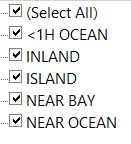

- Because **ocean_proximity** is a column that **categorizes districts** (categorical column) (see image above), we can check how many districts belong to each category by using `value_counts()`.



In [10]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

- For each column, numerical attributes (e.g. count, mean, standard deviation) can be displayed with the `describe()` method

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**<h3>Data overview - Standard deviation</h3>**

**<h5>Definition</h5>** 
- Standard deviation is a unit (measure of data) that 
  + shows how data is spread out (dispersed)
  + from the mean (average) point.

- Also understood as: from mean point, see **how data is spread out**.

<p align="center">
	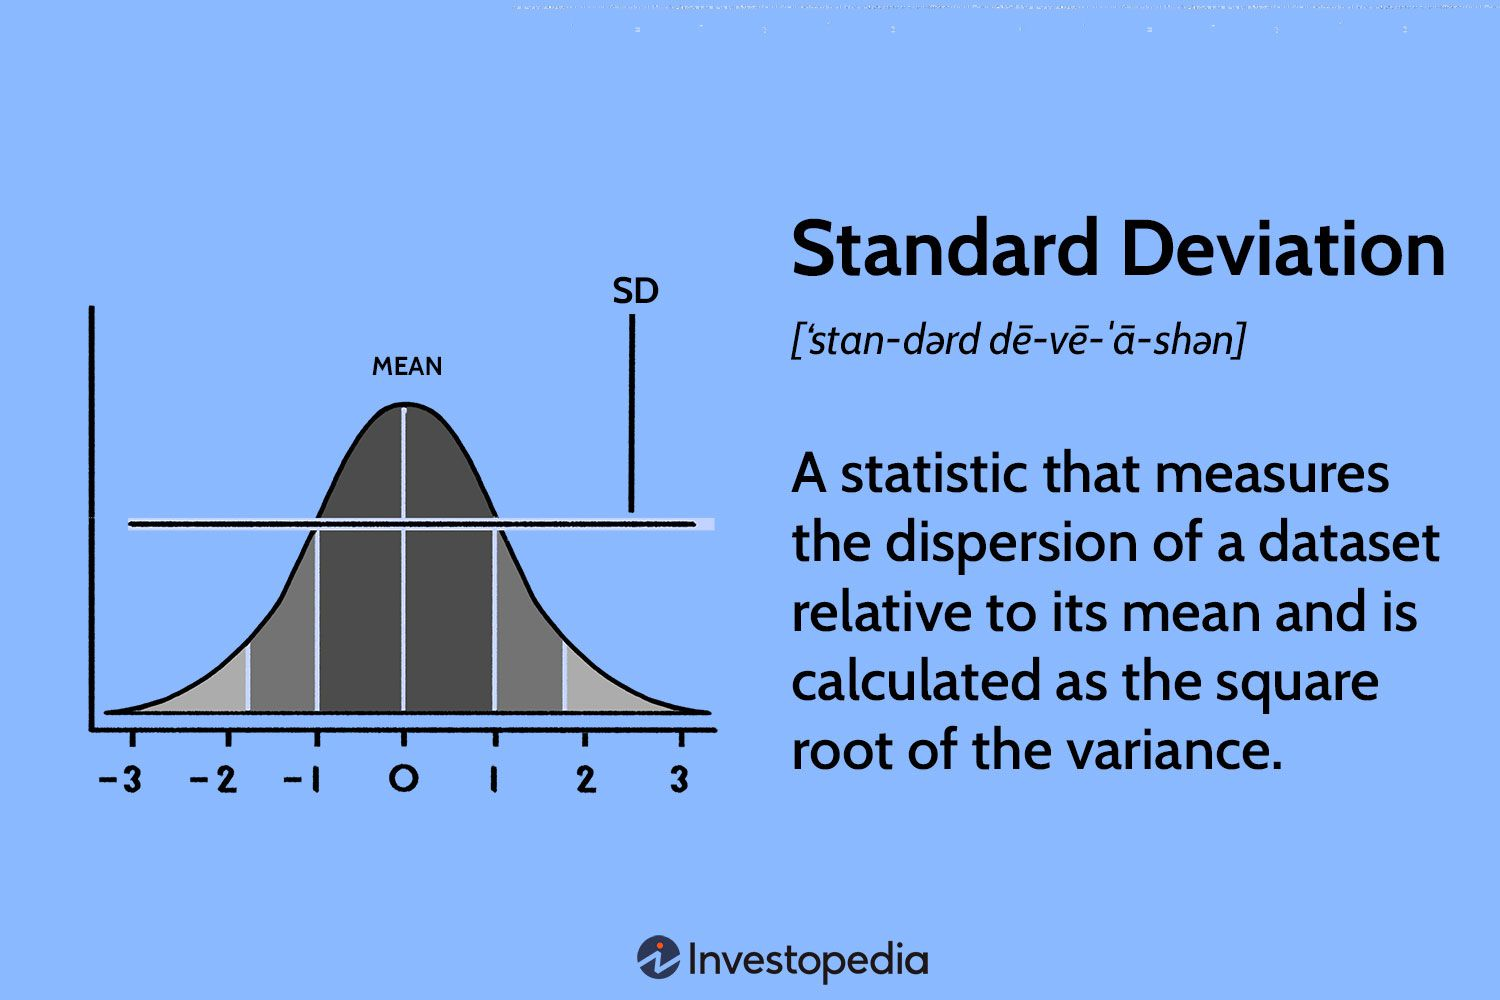 
</p>

**<h5>Quartiles</h5>** 
- Quartile: lines/values that divides the sorted dataset into 4 sections (3 quartiles)

**- First quartile (Q1 line/value)** 
  + 0 > 25%: 1st section (red)
  + 25% > 50%: 2nd section (green)

**- Second quartile (Q2 line/value)**
  + 25% > 50%: 2nd section (green)
  + 50% > 75% : 3rd section (blue)

**- Third quartile (Q3 line/value)**
  + 50% > 75%: 3rd section (blue)
  + 75% > 100% : 4th section (red)

<p align="center">
	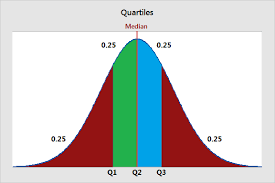 
</p>





**<h3>Data overview - Histogram</h3>**

**<h5>Definition</h5>** 
- A graph that shows 2 things:
  + Vertical (Y-axis): number of instances (districts).
  + Horizontal (X-axis): 1 of 12 columns (attributes) of that instance (district): median income, latitude, longitude, population...

**<h5>MatplotLib Formula</h5>**
Use the `hist()` method, as shown below:
  + `bin`: An area/group/range that groups related datapoints (districts) together. Example: 
<p align="center">
	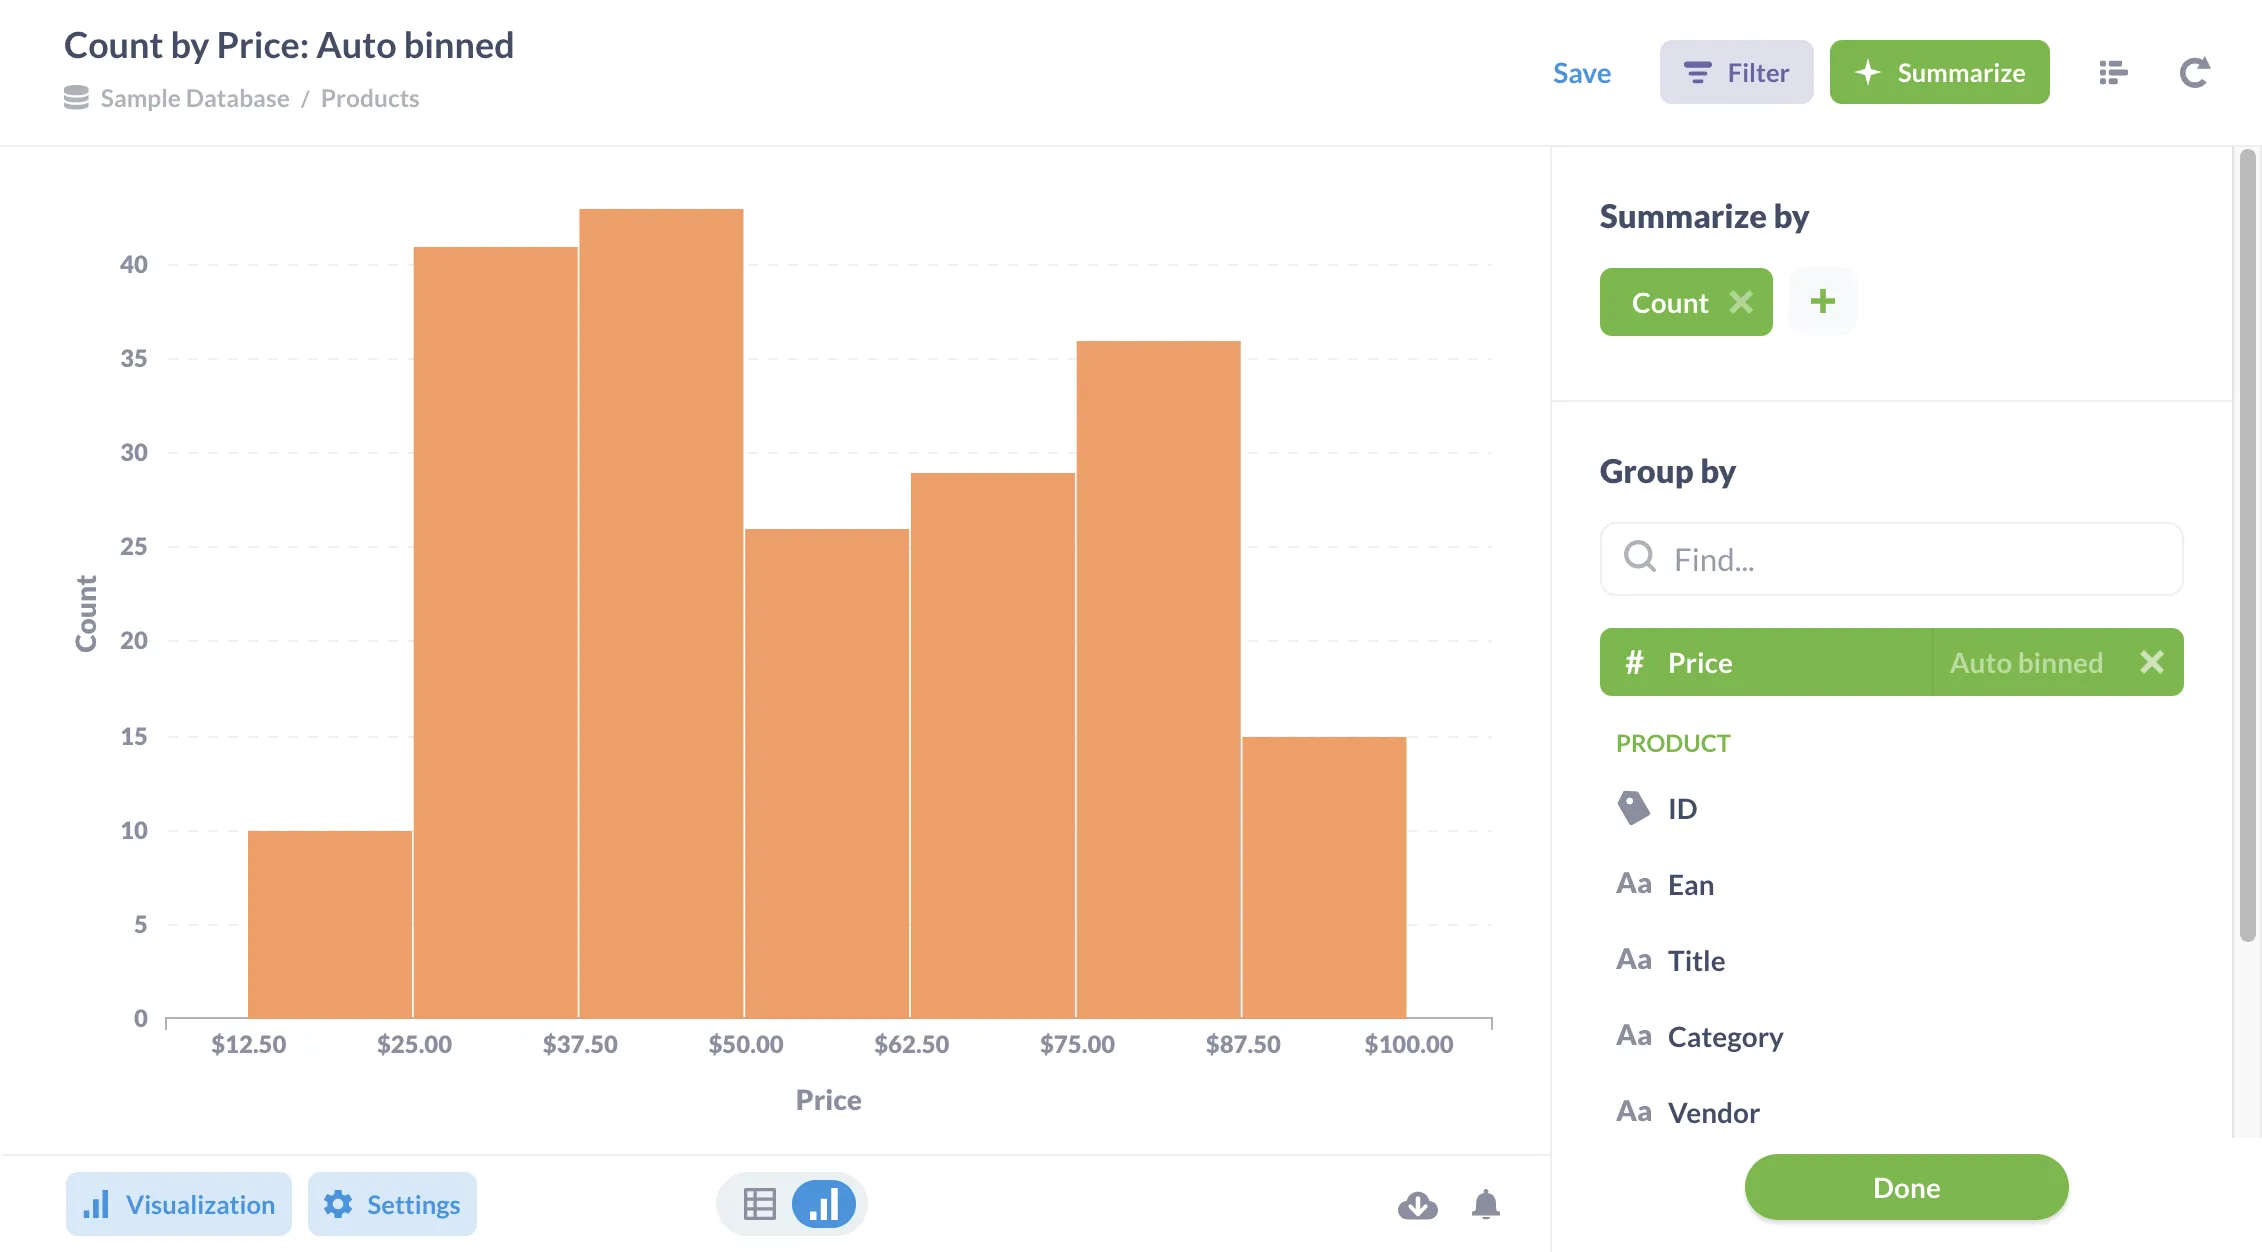 
</p>

  + Here, with price range from `$0`to `$100`, we divide it into 10 bins (groups) in this histogram, each has its range:
      + bin1: We have 10 products with price ranges of `$12.5` > `$25.0`  (with `25.0 - 12.5 = 12.5`)
      + bin2: We have more than 40 products with price ranges of `$25.0` > `$37.5` (with`37.5 - 25.0 = 12.5`)
      + ...
      + bin10: We have 15 products with price ranges of `$87.5` > `$100` (with`100.0 - 87.5 = 12.5`)
  + Notice how each range is about `$12.5`?

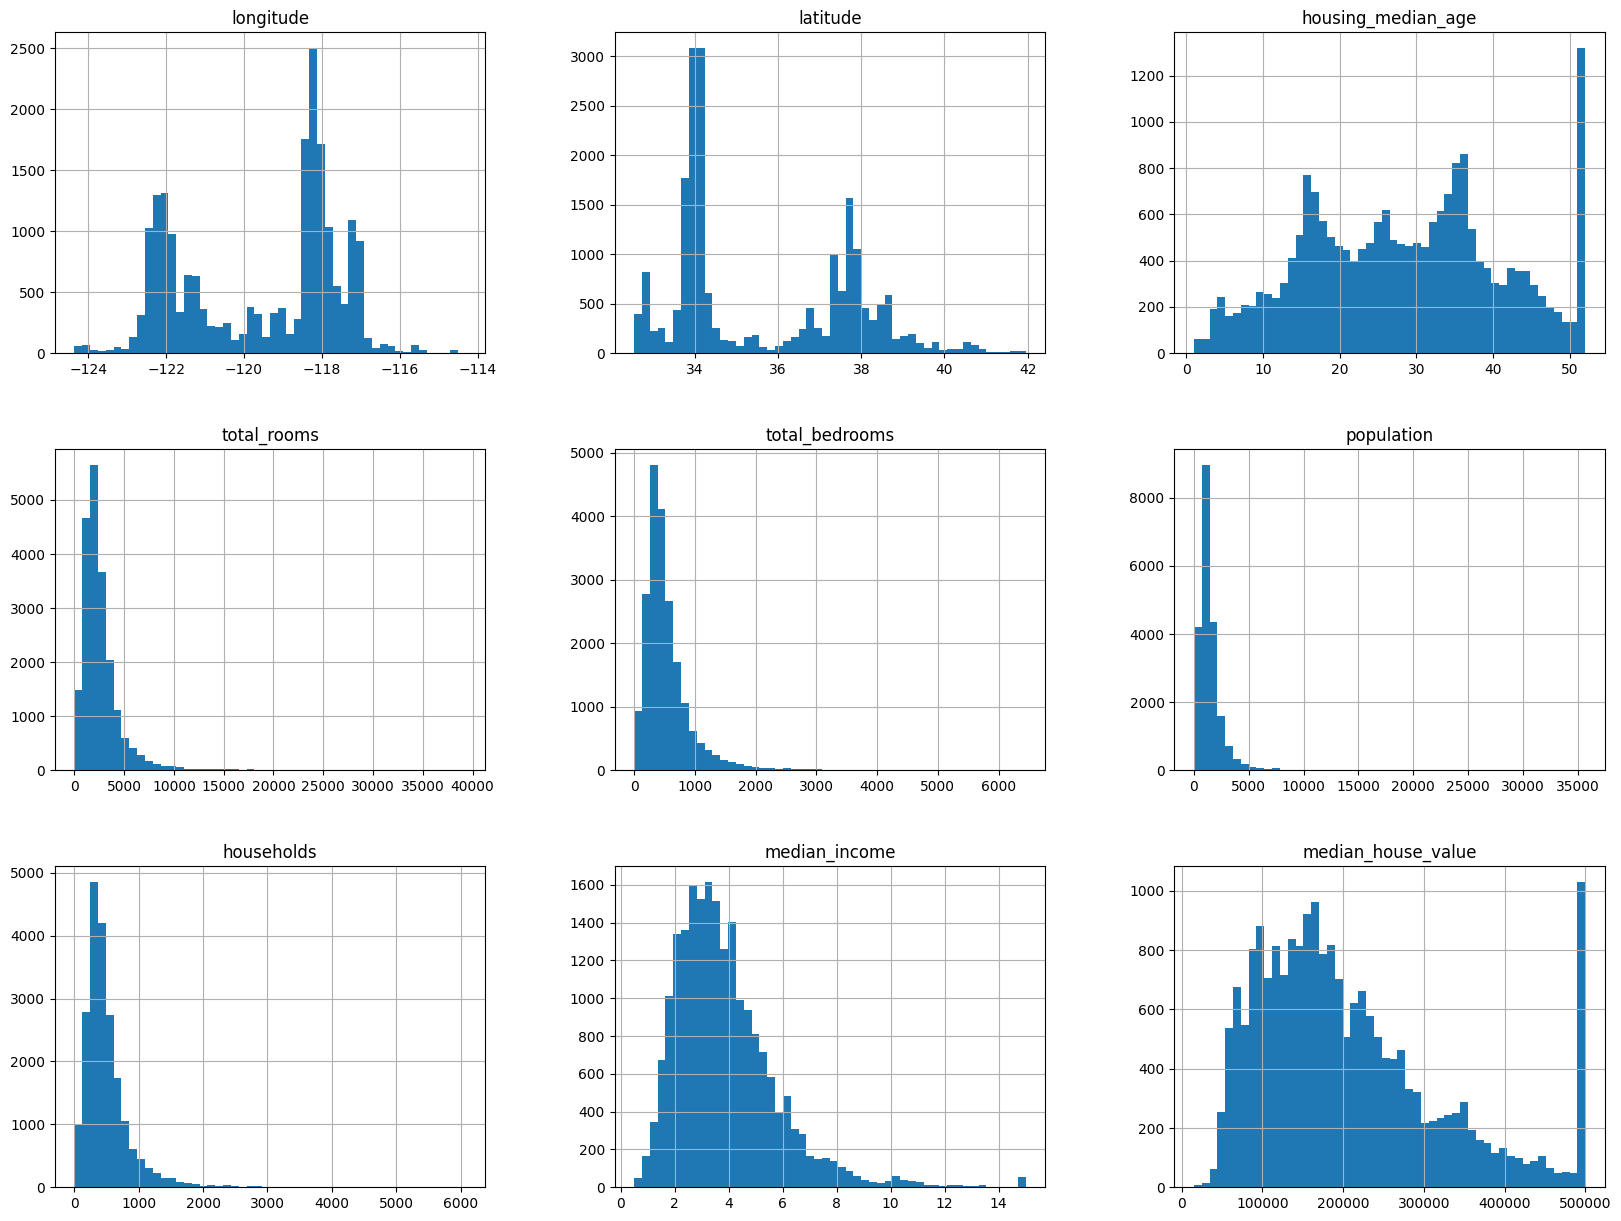

In [15]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()